# CODE (Lecture 5) - 16 November / 2021 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp
from sympy import Matrix
import math

%matplotlib inline
%config InlineBackend.figure_format='retina'



### Integrators

In [7]:
def rk4s(f,h,x,**kwargs): # RK4 single iteration
    k1 = h*f(x,**kwargs)
    k2 = h*f(x+0.5*k1,**kwargs)
    k3 = h*f(x+0.5*k2,**kwargs)
    k4 = h*f(x+k3,**kwargs)
    x += (k1+2*k2+2*k3+k4)/6
    return x 

### Linear Systems

In [113]:
def linearsystem(x, sysmatrix): return sysmatrix.dot(x)

def info(X):
    print(X)
    EIG = np.linalg.eig(X)
    print('Eigen Values :',EIG[0])
    for eigvec in EIG[1]: print('Eigen Vector :',eigvec)
    print('Det :', np.linalg.det(X),'| Trace :', np.trace(X))

In [151]:
A = np.array([[-0.05, -1, 0],
              [1, -0.05, 0],
              [0, 0 , .025]])
info(A)

steps = 100000
h = 0.005
X = np.zeros(shape=(3,steps))
X[:,0] = np.array([10,10,50])
bound = 1000
cutoff = steps-1
for k in range(1,steps):
    X[:,k] = rk4s(linearsystem, h=h, x=X[:,k-1], sysmatrix=A)
    if np.any(X[:,k]<-bound) or np.any(X[:,k]>bound) :
        cutoff = k-1
        print('Cutoff :', cutoff)
        break
        
X = X[:,:cutoff]

[[-0.05  -1.     0.   ]
 [ 1.    -0.05   0.   ]
 [ 0.     0.     0.025]]
Eigen Values : [-0.05 +1.j -0.05 -1.j  0.025+0.j]
Eigen Vector : [0.70710678+0.j 0.70710678-0.j 0.        +0.j]
Eigen Vector : [0.-0.70710678j 0.+0.70710678j 0.+0.j        ]
Eigen Vector : [0.+0.j 0.-0.j 1.+0.j]
Det : 0.0250625 | Trace : -0.07500000000000001
Cutoff : 23965


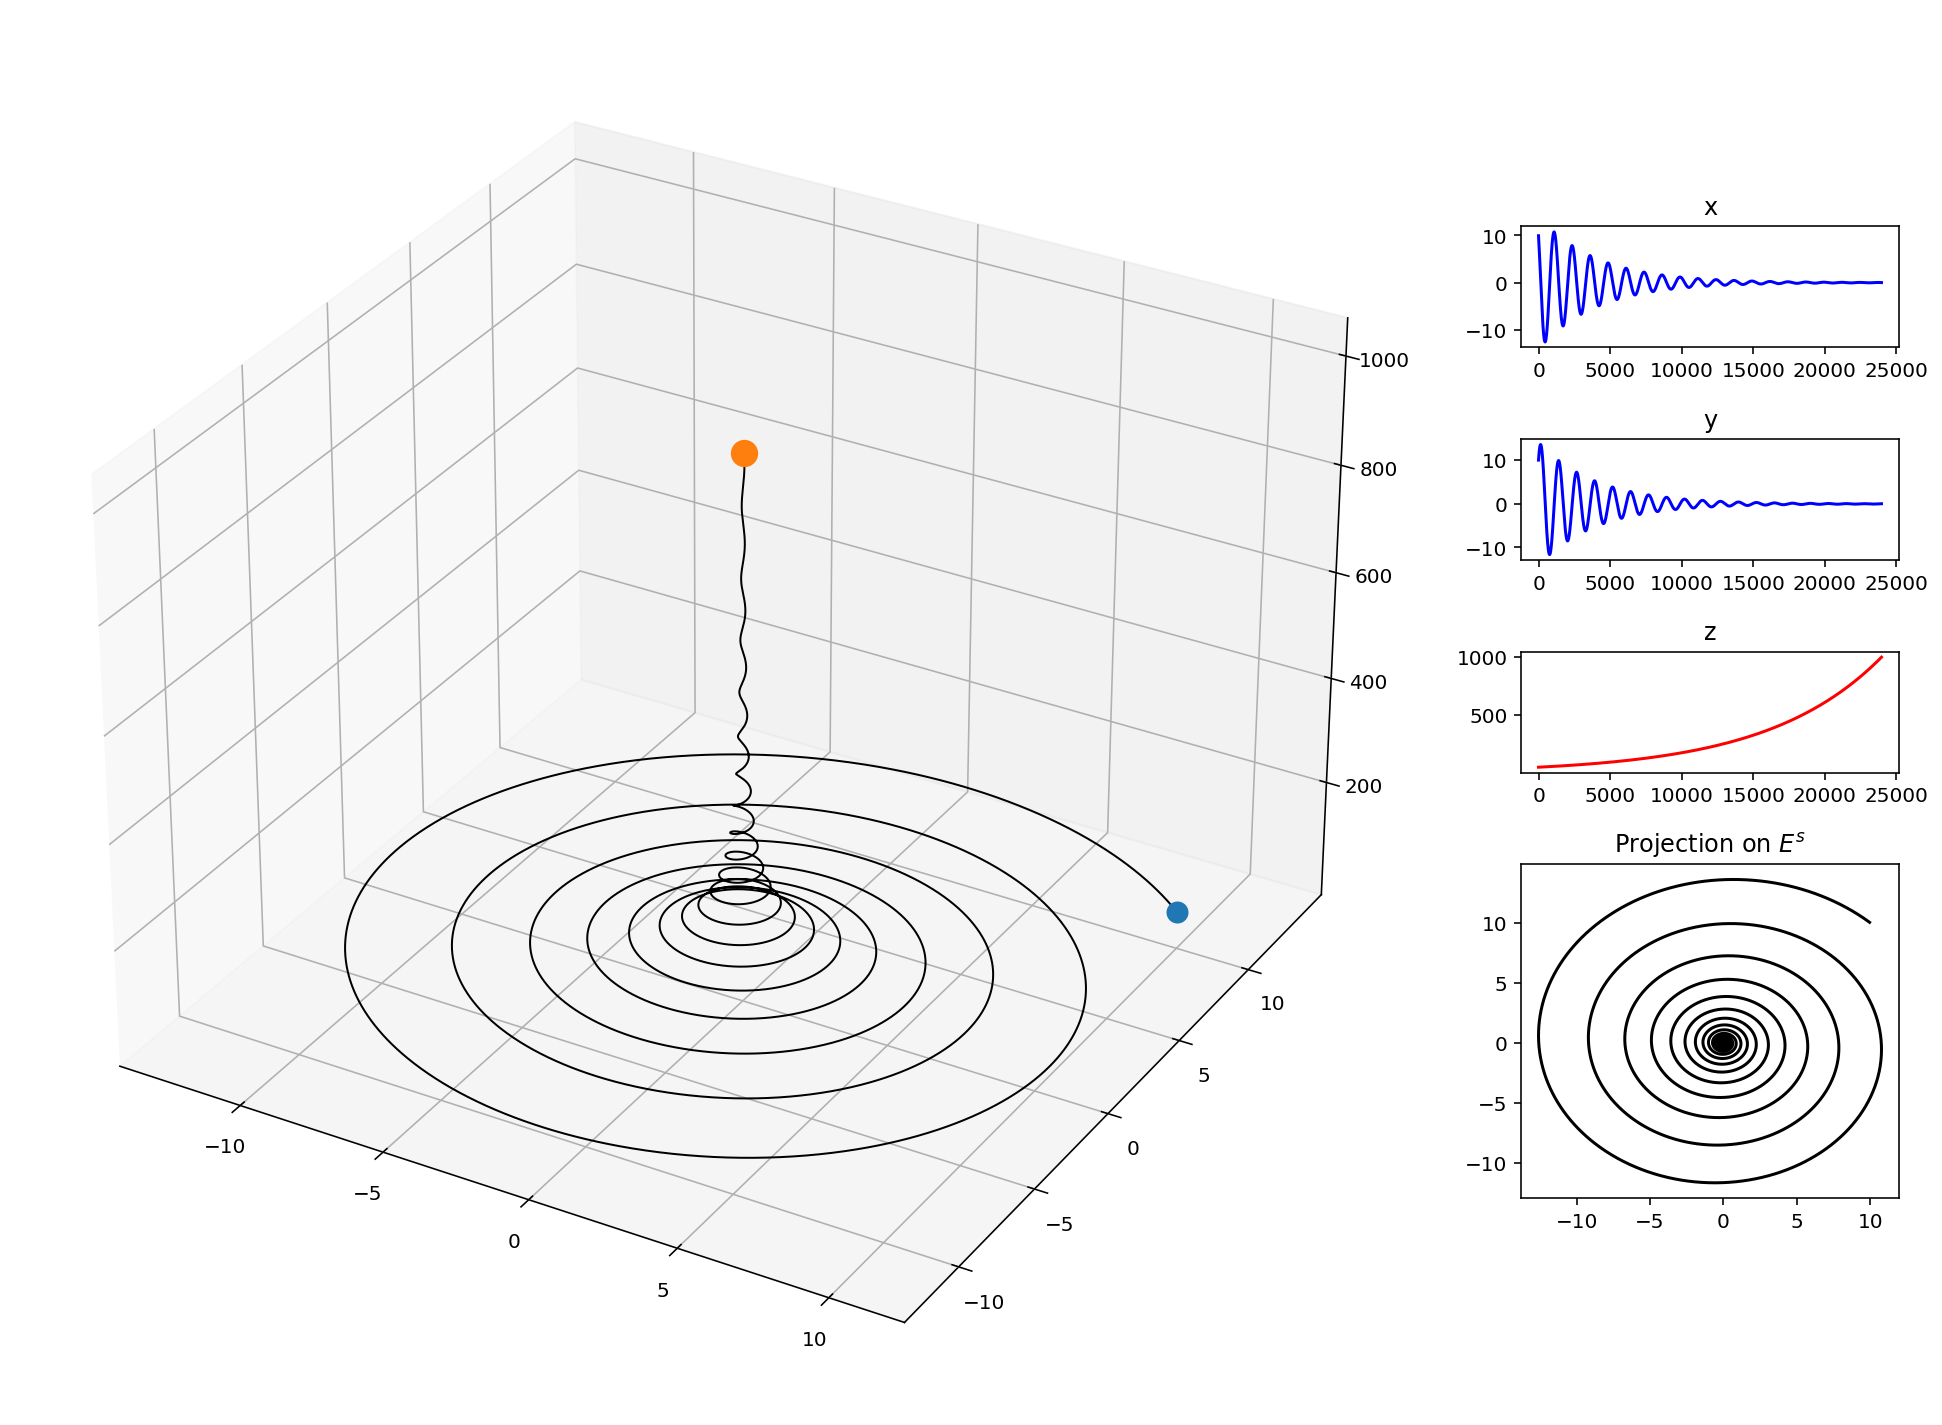

In [152]:
fig = plt.figure(figsize=(14,10))
gs = GridSpec(7,10, figure=fig)
ax1 = fig.add_subplot(gs[:,:8], projection='3d')
ax1.scatter(X[0,0],X[1,0],X[2,0], 'b', s=100)
ax1.plot(X[0,:],X[1,:],X[2,:], '-k', lw=1)
ax1.scatter(X[0,-1],X[1,-1],X[2,-1], 'r', s=160)
#ax1.scatter(0,0,0, 'g', s=100) # Display Origin
fig.add_subplot(gs[1,8:], title='x');plt.plot(X[0,:],'-b')
fig.add_subplot(gs[2,8:], title='y');plt.plot(X[1,:],'-b')
fig.add_subplot(gs[3,8:], title='z');plt.plot(X[2,:],'-r')
fig.add_subplot(gs[4:6,8:], title='Projection on $E^{s}$');plt.plot(X[0,:],X[1,:],'-k')
plt.tight_layout()
plt.show()

to be continued..